In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

Minimize $f(X) = 6x_1 + 3x_2 - 4x_1x_2 - 2x_1^2 - 3x_2^2$
subject to 
$$x_1+x_2\le 1\\
2x_1+3x_2\le 4\\
x_1,x_2\ge0\\
$$ 

Countour Plot

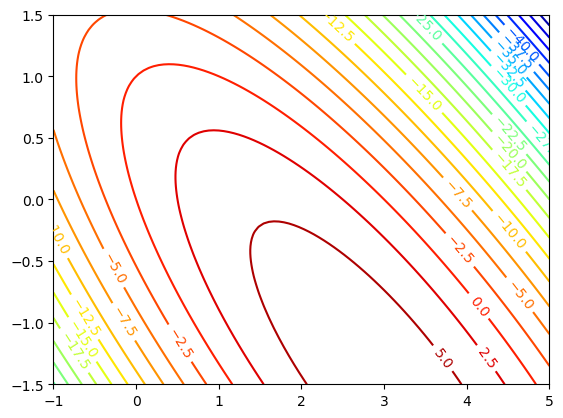

In [134]:
f = lambda x: 6*x[0] + 3*x[1] - 4*x[0]*x[1] - 2*x[0]**2 - 3*x[1]**2
x1 = np.linspace(-1,5,100)
x2 = np.linspace(-1.5,1.5,100)

arr = np.array(np.meshgrid(x1,x2))
F = f(arr)

N = 25
cp = plt.contour(arr[0],arr[1],F,N,cmap='jet')
plt.clabel(cp)
plt.show()

Surface Plot

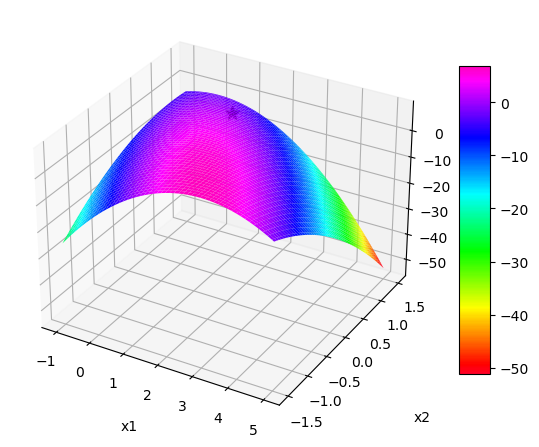

In [135]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1,projection='3d') # set up the axis as a 3D plot
ax.scatter3D(1,1,f([1,1]),c="black",marker="*",s=100)
surf = ax.plot_surface(arr[0],arr[1],F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)

plt.show()

Local Minimum without constraints

In [157]:
x0 = [2,1.5]
res = minimize(f,x0)

res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -4805438.277882847
        x: [ 5.151e+02  8.995e+02]
      nit: 1
      jac: [-5.652e+03 -7.454e+03]
 hess_inv: [[ 6.180e-01 -5.378e-01]
            [-5.378e-01  2.873e-01]]
     nfev: 348
     njev: 112

Local Minimum with constraints

In [156]:
f = lambda x: 6*x[0] + 3*x[1] - 4*x[0]*x[1] - 2*x[0]**2 - 3*x[1]**2

cons = ({'type': 'ineq','fun': lambda x: 1 - x[0] - x[1]},
        {'type': 'ineq','fun': lambda x: 4 - 2*x[0] - 3*x[1]}
        )

bnds = ((0, None), (0, None))

x1 = [2,0]
res = minimize(f,x1, bounds=bnds, constraints= cons)
res


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0125233984581428e-13
       x: [ 0.000e+00  1.000e+00]
     nit: 2
     jac: [ 2.000e+00 -3.000e+00]
    nfev: 6
    njev: 2

In [155]:
res2 = minimize(f,X0)
res2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -4542367.006760239
        x: [ 3.861e+02  9.603e+02]
      nit: 1
      jac: [-5.379e+03 -7.303e+03]
 hess_inv: [[ 6.757e-01 -5.505e-01]
            [-5.505e-01  2.741e-01]]
     nfev: 348
     njev: 112

In [153]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0125233984581428e-13
       x: [ 0.000e+00  1.000e+00]
     nit: 2
     jac: [ 2.000e+00 -3.000e+00]
    nfev: 6
    njev: 2

In [146]:
res3 = minimize(f,X0,bounds=bnds,constraints=cons)
res3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0125233984581428e-13
       x: [ 0.000e+00  1.000e+00]
     nit: 2
     jac: [ 2.000e+00 -3.000e+00]
    nfev: 6
    njev: 2

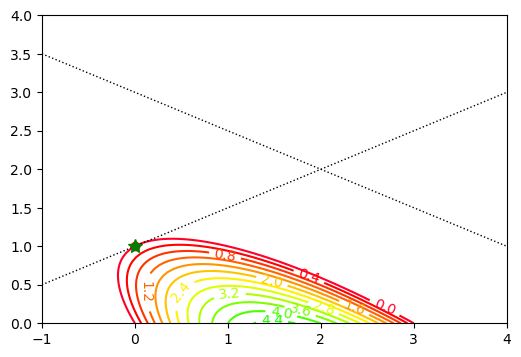

In [154]:
# plotting
x = np.linspace(-1, 4, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

fig = plt.figure(figsize=(6,4))
#ax = fig.add_subplot(1,2,1, projection='3d') # set up the axis as a 3D plot
#surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
#fig.colorbar(surf,shrink=0.4, aspect=10)

#ax = fig.add_subplot(1,2,2)
levels = np.arange(0.0,12,0.4)
cp = plt.contour(X, Y, Z,levels=levels, cmap='gist_rainbow');
plt.clabel(cp)
plt.plot(x, (x+2)/2, 'k:', linewidth=1)
plt.plot(res.x[0],res.x[1],c='r',marker='o')
plt.plot(res2.x[0],res2.x[1],c='b',marker='x')
plt.plot(res3.x[0],res3.x[1],c='g',marker='*',markersize=10)
plt.plot(x, (-x+6)/2, 'k:', linewidth=1)
#plt.fill([1.25,1.25,1.75,1.75], [1.5,2.75,1.5,1.75], alpha=0.3)
plt.axis([-1,4,0,4])
plt.show()